In [34]:
from floris import FlorisModel
fmodel = FlorisModel("input.yaml")
fmodel.set(
    wind_directions=[i for i in range(10)],
    wind_speeds=[8.0]*10,
    turbulence_intensities=[0.06]*10
)
fmodel.run()

AttributeError: turbulence_intensity has been updated to turbulence_intensities in FLORIS v4. Consider using the convert_floris_input_v3_to_v4.py utility in floris/tools to convert from a FLORIS v3 input file to FLORIS v4. See https://nrel.github.io/floris/upgrade_guides/v3_to_v4.html for more information.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from floris import FlorisModel

# Load the configuration file
fmodel = FlorisModel("gch.yaml")

# Get turbine layout
x, y = fmodel.get_turbine_layout()

# Print the turbine layout
print("     x       y")
for _x, _y in zip(x, y):
    print(f"{_x:6.1f}, {_y:6.1f}")

# Optionally, plot the turbine layout
plt.scatter(x, y)
plt.xlabel('X Coordinate (m)')
plt.ylabel('Y Coordinate (m)')
plt.title('Turbine Layout')
plt.grid(True)
plt.show()


KeyError: 'flow_field'

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Load an input file
fmodel = FlorisModel("gch.yaml")

# 2. Modify the inputs with a more complex wind turbine layout
D = 126.0  # Design the layout based on turbine diameter
x = [0, 0,  6 * D, 6 * D]
y = [0, 3 * D, 0, 3 * D]
wind_directions = [270.0, 280.0]
wind_speeds = [8.0, 8.0]
turbulence_intensities = [0.1, 0.1]

# Pass the new data to FlorisInterface
fmodel.set(
    layout_x=x,
    layout_y=y,
    wind_directions=wind_directions,
    wind_speeds=wind_speeds,
    turbulence_intensities=turbulence_intensities,
)

# 3. Calculate the velocities at each turbine for all atmospheric conditions
# All turbines have 0 degrees yaw
fmodel.run()

# 4. Get the total farm power
turbine_powers = fmodel.get_turbine_powers() / 1000.0  # Given in W, so convert to kW
farm_power_baseline = np.sum(turbine_powers, 1)  # Sum over the second dimension

# 5. Develop the yaw control settings
yaw_angles = np.zeros( (2, 4) )    # Construct the yaw array with dimensions for two wind directions, one wind speed, and four turbines
yaw_angles[0, 0] = 25           # At 270 degrees, yaw the first turbine 25 degrees
yaw_angles[0, 1] = 15           # At 270 degrees, yaw the second turbine 15 degrees
yaw_angles[1, 0] = 10           # At 280 degrees, yaw the first turbine 10 degrees
yaw_angles[1, 1] = 0            # At 280 degrees, yaw the second turbine 0 degrees
fmodel.set(yaw_angles=yaw_angles)

# 6. Calculate the velocities at each turbine for all atmospheric conditions with the new yaw settings
fmodel.run()

# 7. Get the total farm power
turbine_powers = fmodel.get_turbine_powers() / 1000.0
farm_power_yaw = np.sum(turbine_powers, 1)

# 8. Compare farm power with and without wake steering
difference = 100 * (farm_power_yaw - farm_power_baseline) / farm_power_baseline
print("Power % difference with yaw")
print(f"    270 degrees: {difference[0]:4.2f}%")
print(f"    280 degrees: {difference[1]:4.2f}%")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\smoha\\.conda\\envs\\windturbine\\Lib\\gch.yaml'

NameError: name 'fmodel' is not defined

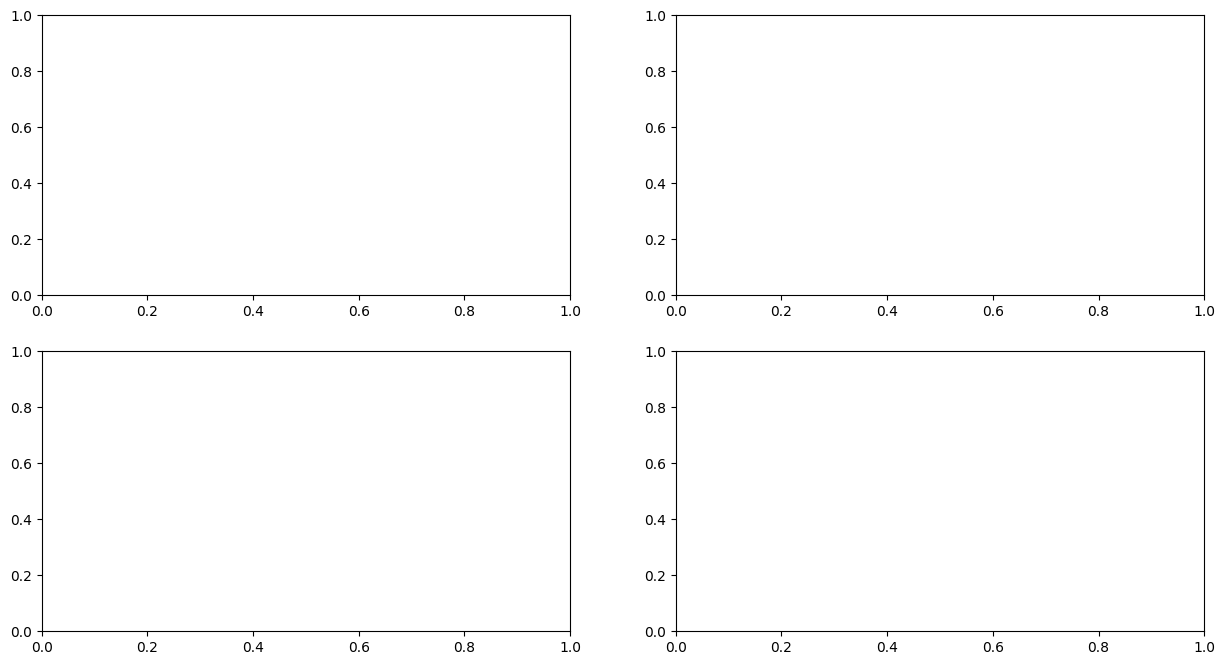

In [7]:
from floris.flow_visualization import visualize_cut_plane
from floris.layout_visualization import plot_turbine_labels


fig, axarr = plt.subplots(2, 2, figsize=(15,8))

# Plot the first wind condition
wd = wind_directions[0]
ws = wind_speeds[0]
ti = turbulence_intensities[0]

fmodel.reset_operation()
fmodel.set(wind_speeds=[ws], wind_directions=[wd], turbulence_intensities=[ti])
horizontal_plane = fmodel.calculate_horizontal_plane(height=90.0)
visualize_cut_plane(horizontal_plane, ax=axarr[0,0], title="270 - Aligned")
plot_turbine_labels(fmodel, axarr[0,0])

fmodel.set(yaw_angles=yaw_angles[0:1])
horizontal_plane = fmodel.calculate_horizontal_plane(height=90.0)
visualize_cut_plane(horizontal_plane, ax=axarr[0,1], title="270 - Yawed")
plot_turbine_labels(fmodel, axarr[0,1])

# Plot the second wind condition
wd = wind_directions[1]
ws = wind_speeds[1]
ti = turbulence_intensities[1]

fmodel.reset_operation()
fmodel.set(wind_speeds=[ws], wind_directions=[wd], turbulence_intensities=[ti])
horizontal_plane = fmodel.calculate_horizontal_plane(height=90.0)
visualize_cut_plane(horizontal_plane, ax=axarr[1,0], title="280 - Aligned")
plot_turbine_labels(fmodel, axarr[1,0])

fmodel.set(yaw_angles=yaw_angles[1:2])
horizontal_plane = fmodel.calculate_horizontal_plane(height=90.0)
visualize_cut_plane(horizontal_plane, ax=axarr[1,1], title="280 - Yawed")
plot_turbine_labels(fmodel, axarr[1,1])

plt.show()